In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

In [2]:
X = np.array([[1, 1, 1], [1, 0, 0], [1, 0, 1], [0, 0, 1]])
Y = np.array([[1], [0], [1], [0]])
print(f"X.shape: {X.shape}")
print(f"Y.shape: {Y.shape}")

X.shape: (4, 3)
Y.shape: (4, 1)


In [3]:
learning_rate = 0.002
input_dims = 3
H1 = 10
H2 = 10
n_epochs = 200
W1 = np.random.rand(input_dims, H1)
W2 = np.random.rand(H1, H2) 
W3 = np.random.rand(H2, 1)
print(f"W1.shape: {W1.shape}")
print(f"W2.shape: {W2.shape}")
print(f"W3.shape: {W3.shape}")

W1.shape: (3, 10)
W2.shape: (10, 10)
W3.shape: (10, 1)


$ \frac{\partial L}{\partial W2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial Z2} \frac{\partial Z2}{\partial W2} $ -> dW2

$\frac{\partial L}{\partial Z2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial AZ2}$ -> dZ

$ \frac{\partial L}{\partial W2} = \frac{\partial L}{\partial A2} \frac{\partial A2}{\partial Z2} \frac{\partial Z2}{\partial W2} \frac{\partial W2}{\partial W1} \frac{\partial A1}{\partial Z1} \frac{\partial Z1}{\partial W1} $ -> dW1

In [4]:
# SGD
losses, epochs = [], list(range(n_epochs))

for i in epochs:
    
    # forward pass
    Z1 = np.dot(X, W1) 
    A1 = np.maximum(Z1, 0) # relu
    Z2 = np.dot(A1, W2) # 
    A2 = np.maximum(Z2, 0) # relu
    Z3 = np.dot(A2, W3)
    A3 = 1 / (1 + np.exp(-Z3)) 
    L = -(1./X.shape[0]) * np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3)) # cost-entropy loss function
    print(f"epoch {i}: {L}")
    losses.append(L)
     
    # backward pass
    dZ3 = A3 - Y # (4,1)
    dW3 = (1./X.shape[0]) * np.dot(A2.T, dZ3) 
    dA2 = np.dot(dZ3, W3.T) 
    dZ2 = dA2.copy()
    dZ2[A2 < 0] = 0 # backprop relu
    dW2 = (1./X.shape[0]) * np.dot(A1.T, dZ2) 
    dA1 = np.dot(dZ2, W2.T) 
    dZ1 = dA1.copy()
    dZ1[A1 < 0] = 0 # backprop
    dW1 = (1./X.shape[0]) * np.dot(X.T, dZ1) 

    # optimize with vanilla SGD
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2  

epoch 0: nan
epoch 1: nan
epoch 2: nan
epoch 3: nan
epoch 4: nan
epoch 5: nan
epoch 6: nan
epoch 7: nan
epoch 8: nan
epoch 9: nan
epoch 10: nan
epoch 11: nan
epoch 12: nan
epoch 13: nan
epoch 14: nan
epoch 15: nan
epoch 16: nan
epoch 17: nan
epoch 18: nan
epoch 19: nan
epoch 20: nan
epoch 21: nan
epoch 22: nan
epoch 23: nan
epoch 24: nan
epoch 25: nan
epoch 26: nan
epoch 27: nan
epoch 28: nan
epoch 29: nan
epoch 30: nan
epoch 31: nan
epoch 32: nan
epoch 33: nan
epoch 34: nan
epoch 35: nan
epoch 36: nan
epoch 37: nan
epoch 38: nan
epoch 39: 6.073346802392557
epoch 40: 6.051024401940546
epoch 41: 6.028753620783384
epoch 42: 6.006534269583833
epoch 43: 5.984366159611604
epoch 44: 5.962249102455134
epoch 45: 5.9401829102805905
epoch 46: 5.918167395689939
epoch 47: 5.896202371748608
epoch 48: 5.874287652019236
epoch 49: 5.8524230504796195
epoch 50: 5.8306083816264795
epoch 51: 5.808843460415387
epoch 52: 5.787128102252004
epoch 53: 5.765462123041129
epoch 54: 5.743845339122195
epoch 55: 5.7

/var/folders/f6/wq5mxjh56fn3n0322tvlpf700000gn/T/ipykernel_90106/3938359630.py:13: RuntimeWarning: divide by zero encountered in log
  L = -(1./X.shape[0]) * np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3)) # cost-entropy loss function
/var/folders/f6/wq5mxjh56fn3n0322tvlpf700000gn/T/ipykernel_90106/3938359630.py:13: RuntimeWarning: invalid value encountered in multiply
  L = -(1./X.shape[0]) * np.sum(Y * np.log(A3) + (1 - Y) * np.log(1 - A3)) # cost-entropy loss function


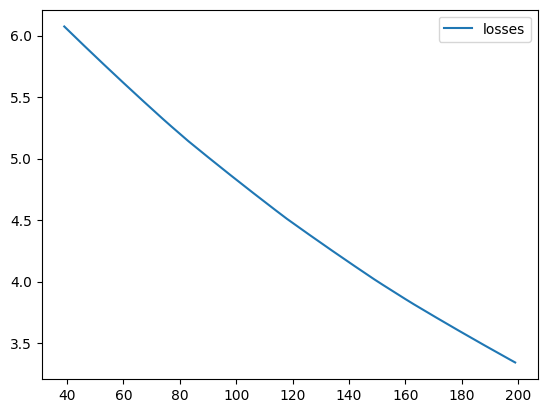

In [5]:
sns.lineplot(data=pd.DataFrame(losses, columns=["losses"]))
plt.show()
plt.close()